## Real Estate Investment Prediction

**Github**

https://github.com/aniket010011/Intern-Projects

**Problem Description**

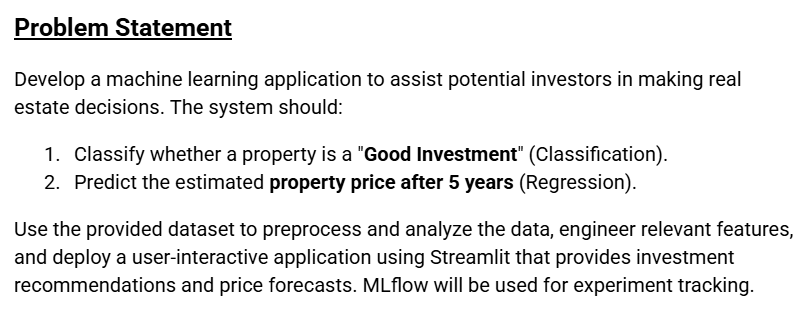

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pointbiserialr
import statsmodels.api as sm
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_data = '/content/india_housing_prices.csv'
df_data = pd.read_csv(file_data)

In [3]:
df_data.shape

(250000, 23)

In [4]:
df_data.head(5)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

###Check Duplicates

In [6]:
df_data.duplicated().sum()

np.int64(0)

###Check Missing Values

In [7]:
df_data.isnull().sum()

,0
ID,0
State,0
City,0
Locality,0
Property_Type,0
BHK,0
Size_in_SqFt,0
Price_in_Lakhs,0
Price_per_SqFt,0
Year_Built,0


In [8]:
df_data.fillna

<bound method NDFrame.fillna of             ID        State       City      Locality      Property_Type  BHK  \
0            1   Tamil Nadu    Chennai   Locality_84          Apartment    1   
1            2  Maharashtra       Pune  Locality_490  Independent House    3   
2            3       Punjab   Ludhiana  Locality_167          Apartment    2   
3            4    Rajasthan    Jodhpur  Locality_393  Independent House    2   
4            5    Rajasthan     Jaipur  Locality_466              Villa    4   
...        ...          ...        ...           ...                ...  ...   
249995  249996      Gujarat  Ahmedabad  Locality_187  Independent House    5   
249996  249997   Tamil Nadu    Chennai  Locality_348          Apartment    1   
249997  249998    Telangana   Warangal  Locality_225              Villa    4   
249998  249999       Odisha    Cuttack  Locality_138              Villa    1   
249999  250000      Haryana    Gurgaon  Locality_268  Independent House    3   

        Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0               4740          489.76            0.10        1990  ...   
1               2364          195.52            0.08        2008  ...   
2               3642          183.79            0.05        1997  ...   
3               2741          300.29            0.11        1991  ...   
4               4823          182.90            0.04        2002  ...   
...              ...             ...             ...         ...  ...   
249995          1995          274.75            0.14        1995  ...   
249996          2293           13.40            0.01        2013  ...   
249997          2910          236.94            0.08        2003  ...   
249998          1149          141.66            0.12        2007  ...   
249999          4313          199.69            0.05        1990  ...   

       Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
0                   35              10                 3   
1                   17               8                 1   
2                   28               9                 8   
3                   34               5                 7   
4                   23               4                 9   
...                ...             ...               ...   
249995              30               8                 6   
249996              12               8                10   
249997              22              10                 4   
249998              18               3                 7   
249999              35              10                 6   

        Public_Transport_Accessibility  Parking_Space  Security  \
0                                 High             No        No   
1                                  Low             No       Yes   
2                                  Low            Yes        No   
3                                 High            Yes       Yes   
4                                  Low             No       Yes   
...                                ...            ...       ...   
249995                             Low             No        No   
249996                             Low             No        No   
249997                            High            Yes       Yes   
249998                             Low            Yes       Yes   
249999                          Medium             No        No   

                                       Amenities Facing Owner_Type  \
0       Playground, Gym, Garden, Pool, Clubhouse   West      Owner   
1       Playground, Clubhouse, Pool, Gym, Garden  North    Builder   
2               Clubhouse, Pool, Playground, Gym  South     Broker   
3       Playground, Clubhouse, Gym, Pool, Garden  North    Builder   
4       Playground, Garden, Gym, Pool, Clubhouse   East    Builder   
...                                          ...    ...        ...   
249995  Playground, Garden, Gym, Clubhouse, Pool   East     Broker   
249996                                Playgr

In [9]:
df = df_data.copy()

In [10]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()

In [11]:
annual_growth_rate = 0.06

df["Future_Price_5Y"] = df["Price_in_Lakhs"] * ((1 + annual_growth_rate) ** 5)

df["Return_5Y_pct"] = ((df["Future_Price_5Y"] - df["Price_in_Lakhs"]) / df["Price_in_Lakhs"]) * 100

df["Good_Investment"] = (df["Return_5Y_pct"] > 10).astype(int)

df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Future_Price_5Y,Return_5Y_pct,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,655.409359,33.822558,1
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,261.649865,33.822558,1
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,245.952479,33.822558,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,401.855759,33.822558,1
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,244.761458,33.822558,1


## Exploratory Data Analysis

Price trends by City

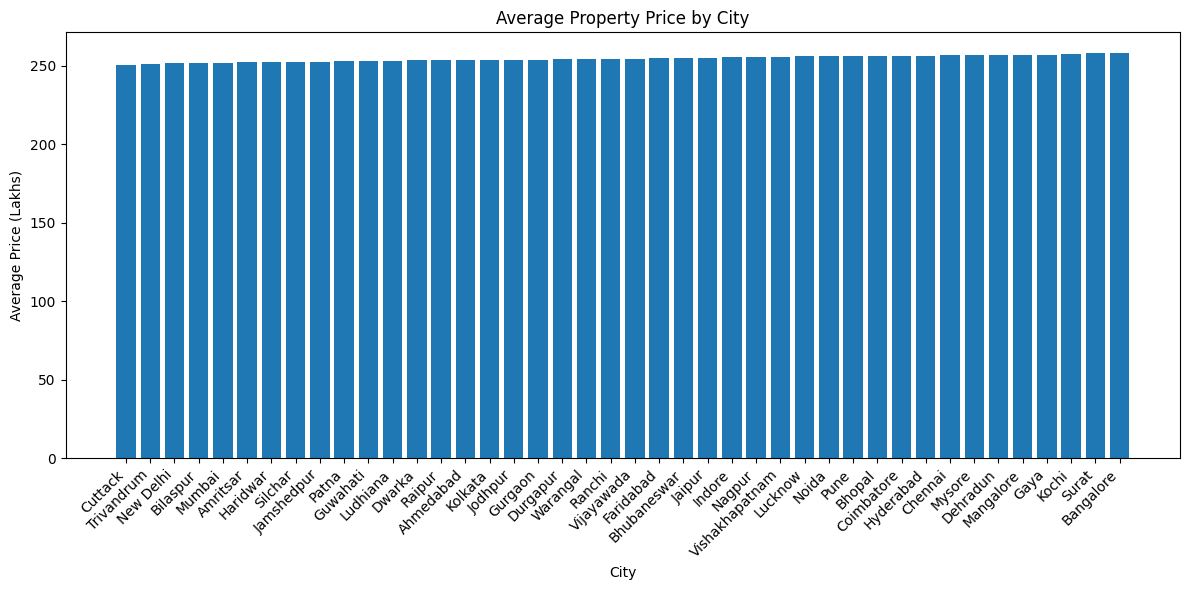

In [12]:
city_price = df.groupby("City")["Price_in_Lakhs"].mean().sort_values()

plt.figure(figsize=(12,6))
plt.bar(city_price.index, city_price.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Average Price (Lakhs)")
plt.title("Average Property Price by City")
plt.tight_layout()
plt.show()

Correlation between Area and Investment Return


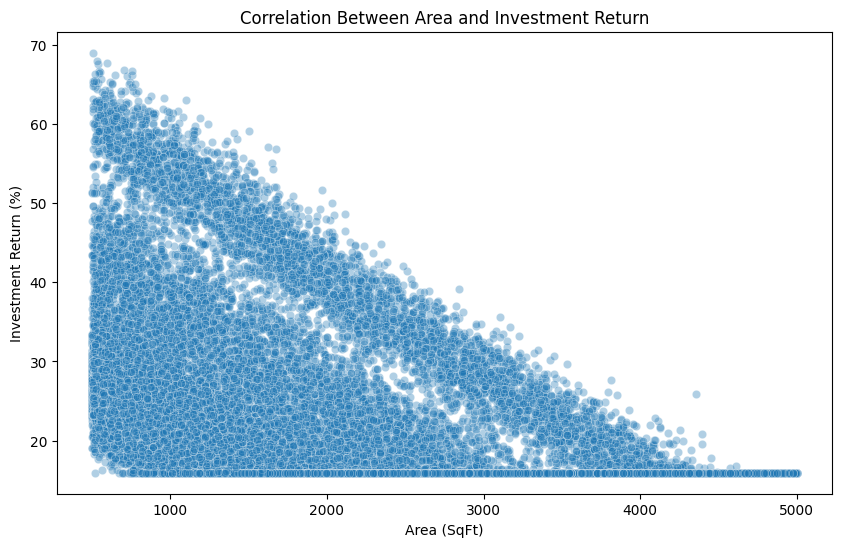

In [13]:
city_growth = {
    "Mumbai": 0.09,
    "Delhi": 0.07,
    "Bengaluru": 0.10,
    "Hyderabad": 0.11,
    "Chennai": 0.08,
}

df["growth_rate"] = df["City"].map(city_growth).fillna(0.06)

area_factor = 0.00002
df["growth_rate"] = df["growth_rate"] - (df["Size_in_SqFt"] * area_factor)

df["growth_rate"] += np.random.normal(0, 0.005, size=len(df))   # ±0.5%

df["growth_rate"] = df["growth_rate"].clip(0.03, 0.12)

df["Future_Price_5Y"] = df["Price_in_Lakhs"] * (1 + df["growth_rate"]) ** 5

df["Return_5Y_pct"] = ((df["Future_Price_5Y"] - df["Price_in_Lakhs"]) / df["Price_in_Lakhs"]) * 100

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Size_in_SqFt", y="Return_5Y_pct", alpha=0.35)
plt.title("Correlation Between Area and Investment Return")
plt.xlabel("Area (SqFt)")
plt.ylabel("Investment Return (%)")
plt.show()

Impact of Crime Rate on Good Investment

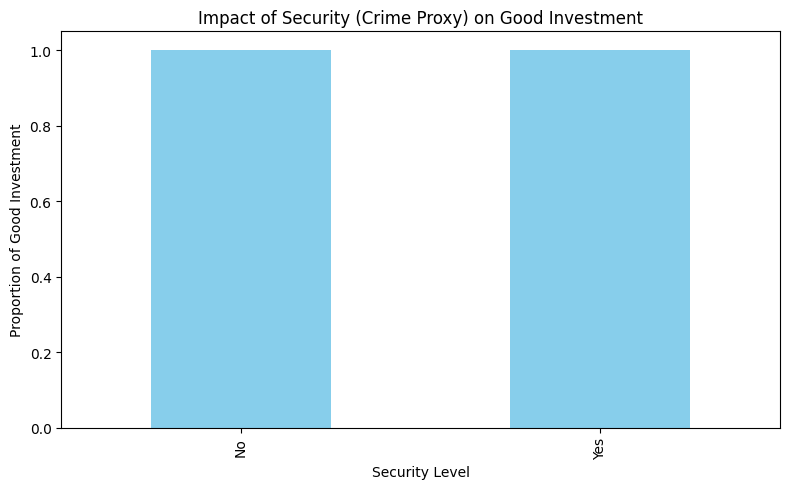

In [14]:
plt.figure(figsize=(8,5))

df.groupby("Security")["Good_Investment"].mean().plot(
    kind="bar", color="skyblue"
)

plt.ylabel("Proportion of Good Investment")
plt.xlabel("Security Level")
plt.title("Impact of Security (Crime Proxy) on Good Investment")
plt.tight_layout()
plt.show()

Relationship between infrastructure score and resale value

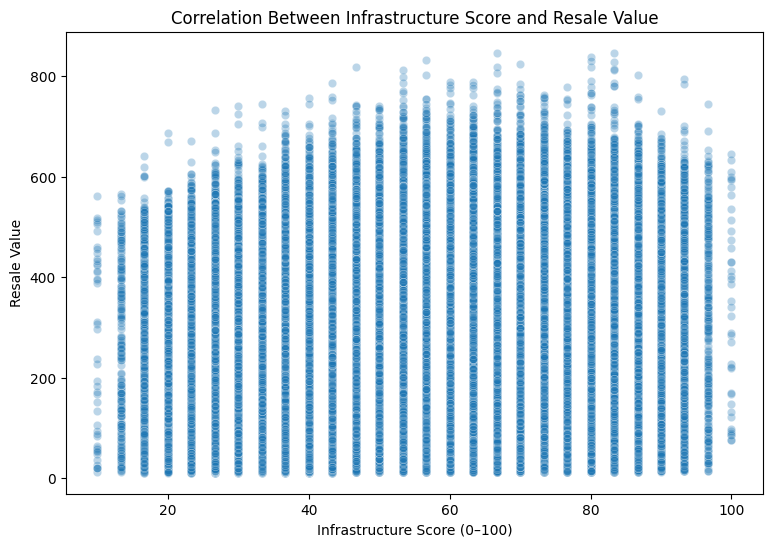

In [15]:
infra_cols = ["Nearby_Schools", "Nearby_Hospitals", "Public_Transport_Accessibility",
              "Security", "Amenities", "Parking_Space"]

avail = [c for c in infra_cols if c in df.columns]

df_num = df[avail].copy()

mapping_yesno = {"Yes": 1, "No": 0}
mapping_highmedlow = {"High": 3, "Medium": 2, "Low": 1}

for col in avail:
    df_num[col] = df_num[col].replace(mapping_yesno)
    df_num[col] = df_num[col].replace(mapping_highmedlow)

    df_num[col] = df_num[col].apply(
        lambda x: len(str(x).split(",")) if isinstance(x, str) and "," in x else x
    )

    df_num[col] = pd.to_numeric(df_num[col], errors="coerce").fillna(0)

df["Infrastructure_Score"] = df_num.mean(axis=1) * 20

df["Resale_Base"] = df["Future_Price_5Y"]

# infrastructure multiplier (±10%)
df["Infra_Adjustment"] = 1 + ((df["Infrastructure_Score"] - 50) / 50) * 0.10
df["Resale_Value"] = df["Resale_Base"] * df["Infra_Adjustment"]

# ---- 5) Plot correlation
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["Infrastructure_Score"], y=df["Resale_Value"], alpha=0.3)
plt.xlabel("Infrastructure Score (0–100)")
plt.ylabel("Resale Value")
plt.title("Correlation Between Infrastructure Score and Resale Value")
plt.show()

In [16]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Owner_Type,Availability_Status,Future_Price_5Y,Return_5Y_pct,Good_Investment,growth_rate,Infrastructure_Score,Resale_Base,Infra_Adjustment,Resale_Value
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,Owner,Ready_to_Move,567.766071,15.927407,1,0.03,70.000000,567.766071,1.040000,590.476713
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,Builder,Under_Construction,226.661267,15.927407,1,0.03,53.333333,226.661267,1.006667,228.172342
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,Broker,Ready_to_Move,213.062982,15.927407,1,0.03,76.666667,213.062982,1.053333,224.426341
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,Builder,Ready_to_Move,348.118412,15.927407,1,0.03,73.333333,348.118412,1.046667,364.363938
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,Builder,Ready_to_Move,212.031228,15.927407,1,0.03,66.666667,212.031228,1.033333,219.098936


Pipeline and Model Building

In [26]:
y_class = df["Good_Investment"]
y_reg   = df["Future_Price_5Y"]

X = df.drop(columns=["Good_Investment", "Future_Price_5Y", "ID"], errors="ignore")

In [27]:
if y_class.dtype == 'object':
    le = LabelEncoder()
    y_class = le.fit_transform(y_class)

# If only one class exists → rebuild using median return
if len(np.unique(y_class)) < 2:
    median_return = df["Return_5Y_pct"].median()
    df["Good_Investment"] = (df["Return_5Y_pct"] > median_return).astype(int)
    y_class = df["Good_Investment"].values

In [28]:
numeric_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Return_5Y_pct', 'growth_rate', 'Infrastructure_Score', 'Resale_Base', 'Infra_Adjustment', 'Resale_Value']
Categorical features: ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


In [29]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [30]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [31]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

Classification Prediction

In [32]:
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "LGBMClassifier": lgb.LGBMClassifier(),
    "XGBClassifier": XGBClassifier(tree_method="hist", eval_metric="logloss")
}

print("=== Classification Results ===")
for name, model in classifiers.items():
    clf = Pipeline(steps=[("preprocess", preprocess),
                         ("model", model)])

    clf.fit(X_train_c, y_train_c)
    preds = clf.predict(X_test_c)

    acc = accuracy_score(y_test_c, preds)
    print(f"{name}: Accuracy = {acc:.4f}")

=== Classification Results ===
LogisticRegression: Accuracy = 0.7981
[LightGBM] [Info] Number of positive: 89140, number of negative: 110860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3668
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 925
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.445700 -> initscore=-0.218060
[LightGBM] [Info] Start training from score -0.218060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

Regression Prediction

In [33]:
regressors = {
    "LinearRegression": LinearRegression(),
    "LGBMRegressor": lgb.LGBMRegressor(),
    "XGBRegressor": XGBRegressor(tree_method="hist", objective="reg:squarederror")
}

print("\n=== Regression Results ===")
for name, model in regressors.items():
    reg = Pipeline(steps=[("preprocess", preprocess),
                         ("model", model)])

    reg.fit(X_train_r, y_train_r)
    preds = reg.predict(X_test_r)

    r2 = r2_score(y_test_r, preds)
    print(f"{name}: R2 Score = {r2:.4f}")


=== Regression Results ===
LinearRegression: R2 Score = 1.0000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3668
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 925
[LightGBM] [Info] Start training from score 300.165063
LGBMRegressor: R2 Score = 1.0000
XGBRegressor: R2 Score = 1.0000


Classification Models Performance


=== LogisticRegression ===
Accuracy = 0.7981


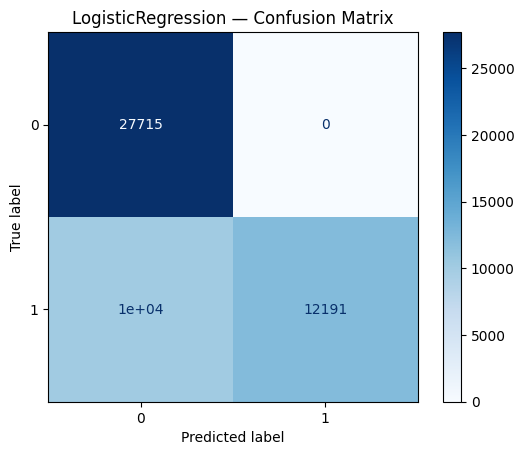

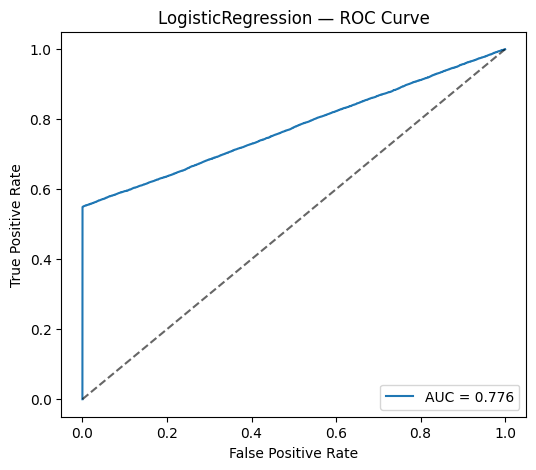


=== LGBMClassifier ===
[LightGBM] [Info] Number of positive: 89140, number of negative: 110860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3668
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 925
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.445700 -> initscore=-0.218060
[LightGBM] [Info] Start training from score -0.218060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

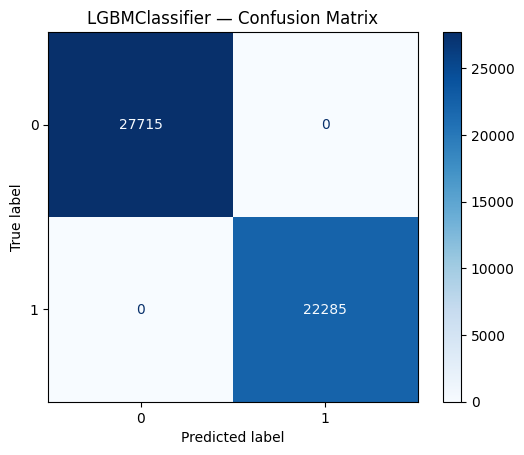

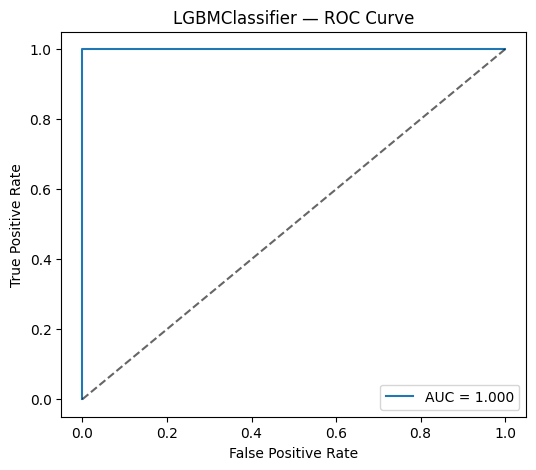


=== XGBClassifier ===
Accuracy = 0.7987


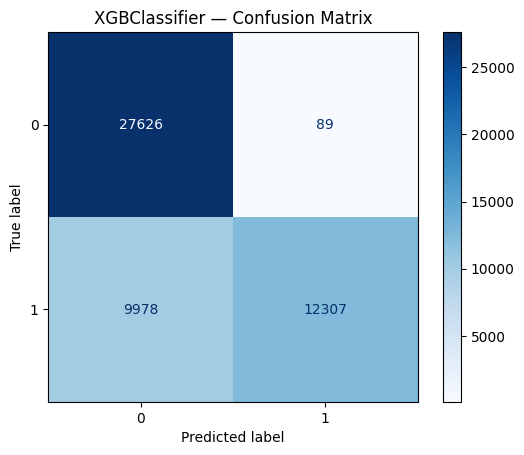

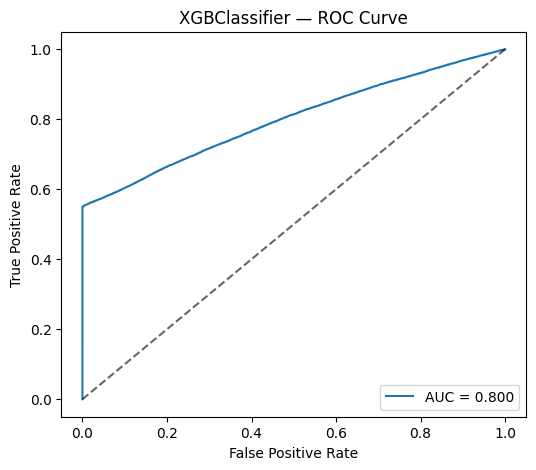

In [37]:
from sklearn.metrics import auc, roc_curve, ConfusionMatrixDisplay, precision_recall_curve

for name, model in classifiers.items():
    print(f"\n=== {name} ===")
    clf = Pipeline([("preprocess", preprocess), ("model", model)])

    clf.fit(X_train_c, y_train_c)
    preds = clf.predict(X_test_c)

    acc = accuracy_score(y_test_c, preds)
    print(f"Accuracy = {acc:.4f}")

    disp = ConfusionMatrixDisplay.from_predictions(y_test_c, preds, cmap="Blues", normalize=None)
    disp.ax_.set_title(f"{name} — Confusion Matrix")
    plt.show()

    classes = np.unique(y_test_c)
    if classes.size == 2:
        y_score = None
        if hasattr(clf, "predict_proba"):
            try:
                y_score = clf.predict_proba(X_test_c)[:, 1]
            except Exception:
                y_score = None
        if y_score is None and hasattr(clf, "decision_function"):
            try:
                y_score = clf.decision_function(X_test_c)
            except Exception:
                y_score = None

        if y_score is not None:
            fpr, tpr, _ = roc_curve(y_test_c, y_score)
            roc_auc = auc(fpr, tpr)
            plt.figure(figsize=(6,5))
            plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
            plt.plot([0,1], [0,1], "k--", alpha=0.6)
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"{name} — ROC Curve")
            plt.legend(loc="lower right")
            plt.show()
        else:
            print("No probability/score available for ROC.")
    else:
        print("ROC skipped (not binary classification).")

Regression Models Performance

In [41]:
def evaluate_all_regressors(regressors, preprocess, X_train_r, y_train_r, X_test_r, y_test_r):

    for name, model in regressors.items():
        print(f"\n=== {name} ===")

        reg = Pipeline([("preprocess", preprocess),
                        ("model", model)])

        reg.fit(X_train_r, y_train_r)
        y_pred = reg.predict(X_test_r)

        r2 = r2_score(y_test_r, y_pred)
        rmse = mean_squared_error(y_test_r, y_pred) ** 0.5

        print(f"R2 Score = {r2:.4f},  RMSE = {rmse:.4f}")

        fig, axes = plt.subplots(1, 3, figsize=(18, 4))

        axes[0].scatter(y_test_r, y_pred, alpha=0.4, s=12)
        minv = min(y_test_r.min(), y_pred.min())
        maxv = max(y_test_r.max(), y_pred.max())
        axes[0].plot([minv, maxv], [minv, maxv], "r--")
        axes[0].set_title(f"{name} — Predicted vs Actual")
        axes[0].set_xlabel("Actual")
        axes[0].set_ylabel("Predicted")

        residuals = y_test_r - y_pred
        axes[1].scatter(y_pred, residuals, alpha=0.4, s=12)
        axes[1].axhline(0, color="red", linestyle="--")
        axes[1].set_title(f"{name} — Residuals vs Predicted")
        axes[1].set_xlabel("Predicted")
        axes[1].set_ylabel("Residual")

        sns.histplot(residuals, kde=True, ax=axes[2])
        axes[2].set_title(f"{name} — Residuals Distribution")

        plt.tight_layout()
        plt.show()


=== LinearRegression ===
R2 Score = 1.0000,  RMSE = 0.0017


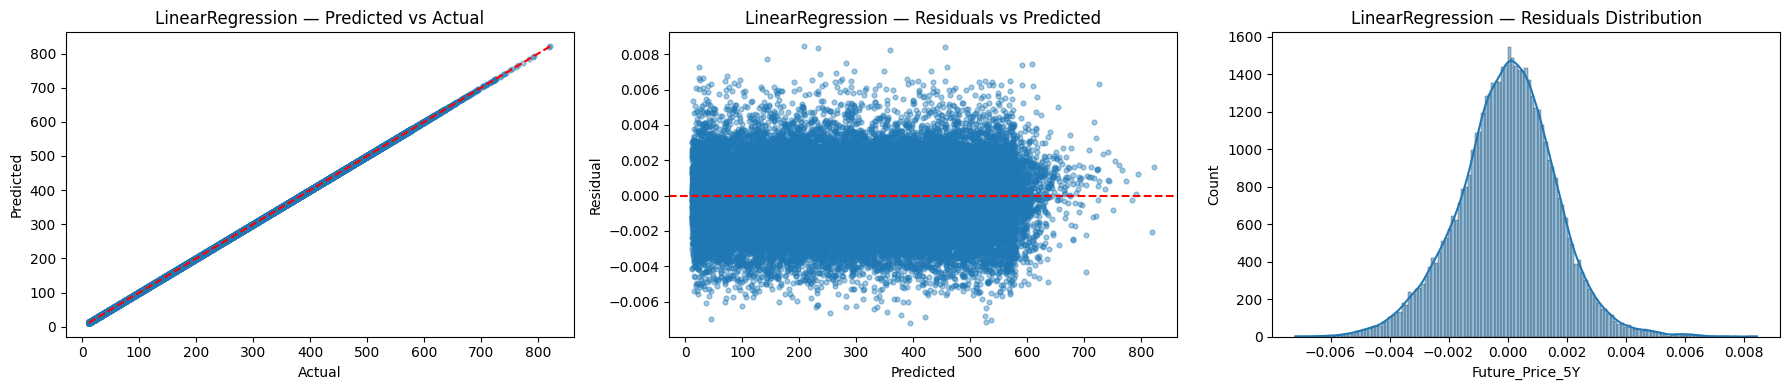


=== LGBMRegressor ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3668
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 925
[LightGBM] [Info] Start training from score 300.165063
R2 Score = 1.0000,  RMSE = 0.8922


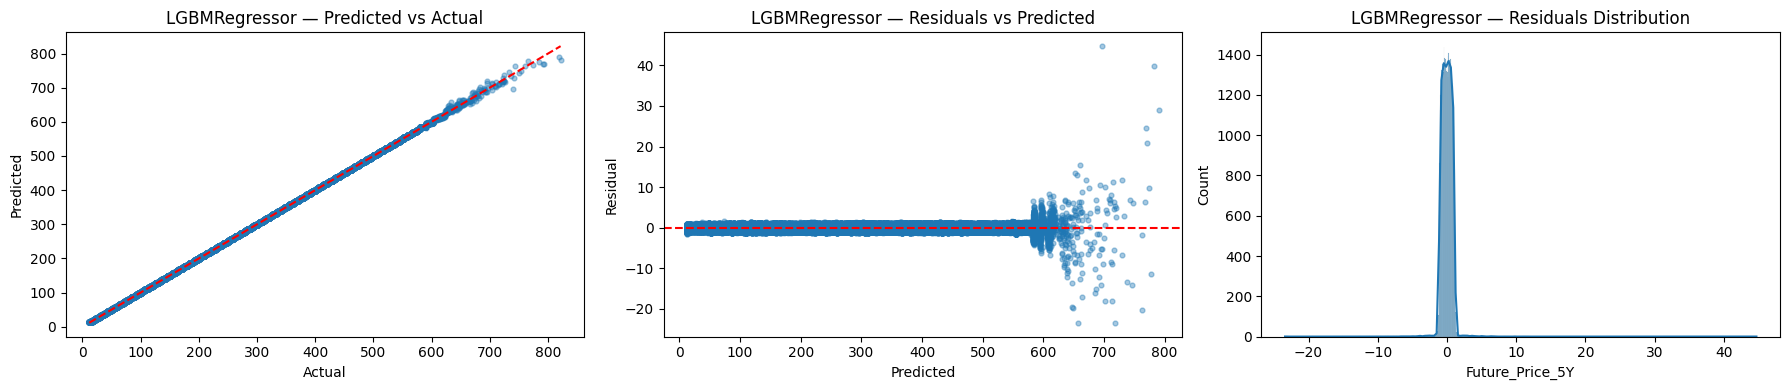


=== XGBRegressor ===
R2 Score = 1.0000,  RMSE = 0.7292


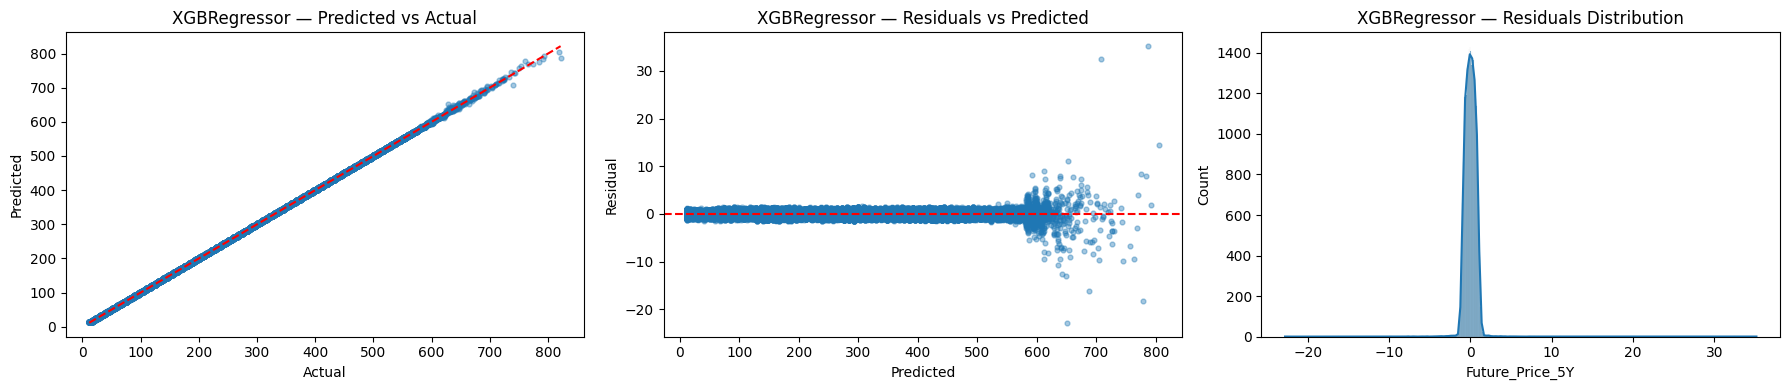

In [42]:
evaluate_all_regressors(
    regressors,
    preprocess,
    X_train_r, y_train_r,
    X_test_r, y_test_r
)

Saving Best Classifier Model

In [43]:
best_clf_name = None
best_clf_score = -1
best_clf_model = None

print("=== Finding Best Classifier ===")

for name, model in classifiers.items():
    clf_pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    clf_pipe.fit(X_train_c, y_train_c)
    preds = clf_pipe.predict(X_test_c)
    acc = accuracy_score(y_test_c, preds)

    print(f"{name}: Accuracy = {acc:.4f}")

    if acc > best_clf_score:
        best_clf_score = acc
        best_clf_name = name
        best_clf_model = clf_pipe

print(f"\nBest Classifier: {best_clf_name}  (Accuracy = {best_clf_score:.4f})")

joblib.dump(best_clf_model, f"best_classifier_{best_clf_name}.pkl")
print(f"Saved: best_classifier_{best_clf_name}.pkl")

=== Finding Best Classifier ===
LogisticRegression: Accuracy = 0.7981
[LightGBM] [Info] Number of positive: 89140, number of negative: 110860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3668
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 925
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.445700 -> initscore=-0.218060
[LightGBM] [Info] Start training from score -0.218060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

Saving Best Regressor Model

In [44]:
best_reg_name = None
best_reg_score = -999
best_reg_model = None

print("\n=== Finding Best Regressor ===")

for name, model in regressors.items():
    reg_pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    reg_pipe.fit(X_train_r, y_train_r)
    preds = reg_pipe.predict(X_test_r)
    r2 = r2_score(y_test_r, preds)

    print(f"{name}: R2 = {r2:.4f}")

    if r2 > best_reg_score:
        best_reg_score = r2
        best_reg_name = name
        best_reg_model = reg_pipe

print(f"\nBest Regressor: {best_reg_name}  (R2 = {best_reg_score:.4f})")

joblib.dump(best_reg_model, f"best_regressor_{best_reg_name}.pkl")
print(f"Saved: best_regressor_{best_reg_name}.pkl")


=== Finding Best Regressor ===
LinearRegression: R2 = 1.0000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3668
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 925
[LightGBM] [Info] Start training from score 300.165063
LGBMRegressor: R2 = 1.0000
XGBRegressor: R2 = 1.0000

Best Regressor: LinearRegression  (R2 = 1.0000)
Saved: best_regressor_LinearRegression.pkl
